<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load data set
!wget --quiet -P  / https://raw.githubusercontent.com/dpanagop/ML_and_AI_examples/master/data/bank-additional-full_test.csv

In [2]:
!ls

bank-additional-full_test.csv  sample_data


In [0]:
#load libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [0]:
dat=pd.read_csv("bank-additional-full_test.csv",sep=';', error_bad_lines=False)

In [5]:
dat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
dat.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [0]:
dat = dat.drop([ 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], 1)

In [8]:
dat.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'], dtype=object)

In [9]:
dat['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
dat['y'].value_counts()/dat['y'].count()

no     0.887346
yes    0.112654
Name: y, dtype: float64

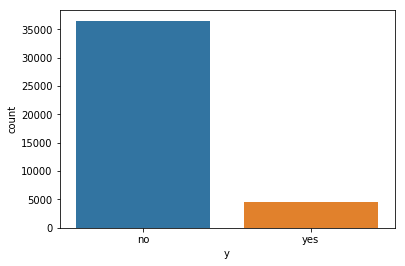

In [11]:
sns.countplot(x='y',data=dat)

In [12]:
dat.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [13]:
dat.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [14]:
cat_columns = dat.select_dtypes(['object']).columns
dat[cat_columns] = dat[cat_columns].apply(lambda x: x.astype('category'))
dat[cat_columns] = dat[cat_columns].apply(lambda x: x.cat.codes)
dat.dtypes

age            int64
job             int8
marital         int8
education       int8
default         int8
housing         int8
loan            int8
contact         int8
month           int8
day_of_week     int8
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome        int8
y               int8
dtype: object

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('y',1) , dat['y'], test_size=0.3, random_state=0)

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.90


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10696   273]
 [  923   465]]


In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix=conf_matrix/y_test.size
print(conf_matrix)

[[0.86558226 0.02209274]
 [0.07469451 0.03763049]]


In [19]:
(conf_matrix[0,0]+conf_matrix[1,1])

0.9032127539046695

In [39]:
type(confusion_matrix)

numpy.ndarray

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
categories_size=np.array([10969,1388])
conf_matrix=conf_matrix/categories_size[:,None]
print(conf_matrix)

[[0.97511168 0.02488832]
 [0.66498559 0.33501441]]


In [23]:
y_test.value_counts()

0    10969
1     1388
Name: y, dtype: int64

In [0]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_X_train,os_y_train=os.fit_sample(X_train, y_train)
os_X_train = pd.DataFrame(data=os_X_train,columns=X_train.columns )
os_y_train= pd.DataFrame(data=os_y_train,columns=['y'])

In [29]:
logreg = LogisticRegression()
logreg.fit(os_X_train, os_y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.84


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
categories_size=np.array([10969,1388])
conf_matrix=conf_matrix/categories_size[:,None]
print(conf_matrix)

[[0.8653478  0.1346522 ]
 [0.32420749 0.67579251]]
